In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
#%matplotlib qt 

In [3]:
plt.rcParams['font.size'] = 12
#plt.style.use('ggplot')
plt.rcParams["axes.grid"] = True
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['figure.figsize'] = 8, 4

In [4]:
from nu_smrutils import loaddat

In [5]:
dname = dict(BNCI2014004 = 'aBNCI2014004R.pickle',
             BNCI2014001 = 'aBNCI2014001R.pickle',
             Weibo2014   = 'aWeibo2014R.pickle',
             Physionet   = 'aPhysionetRR.pickle')

### Load data
Load EEG data for visualization

In [6]:
# itemname is one of : ['BNCI2014004', 'BNCI2014001', 'Weibo2014', 'Physionet']
# itemname = 'BNCI2014001'

In [12]:
# filename = dname[itemname]
# iname = itemname + '__'    

# data = loaddat(filename)

from moabb.datasets import (
    BNCI2014001, 
    BNCI2014004, 
    PhysionetMI, 
    Weibo2014
)
from moabb.paradigms import LeftRightImagery

raw_dataset = BNCI2014001()
data = raw_dataset.get_data()
print(data.keys())

print('Number of subjects in data :', len(data.keys()))

100%|#####################################| 42.8M/42.8M [00:00<00:00, 42.9GB/s]
SHA256 hash of downloaded file: 054f02e70cf9c4ada1517e9b9864f45407939c1062c6793516585c6f511d0325
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|#############################################| 43.8M/43.8M [00:00<?, ?B/s]
SHA256 hash of downloaded file: 53d415f39c3d7b0c88b894d7b08d99bcdfe855ede63831d3691af1a45607fb62
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|#############################################| 43.1M/43.1M [00:00<?, ?B/s]
SHA256 hash of downloaded file: 5ddd5cb520b1692c3ba1363f48d98f58f0e46f3699ee50d749947950fc39db27
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|################################

100%|#####################################| 44.8M/44.8M [00:00<00:00, 44.9GB/s]
SHA256 hash of downloaded file: 5d79649a42df9d51215def8ffbdaf1c3f76c54b88b9bbaae721e8c6fd972cc36
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])
Number of subjects in data : 9



Test 
---



In [13]:
# select data from on subject and use it for demostration
subject = 1
s1 = data[subject]
print(s1)

{'session_T': {'run_0': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_1': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_2': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_3': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_4': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_5': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>}, 'session_E': {'run_0': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_1': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_2': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_3': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_4': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, 'run_5': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>}}


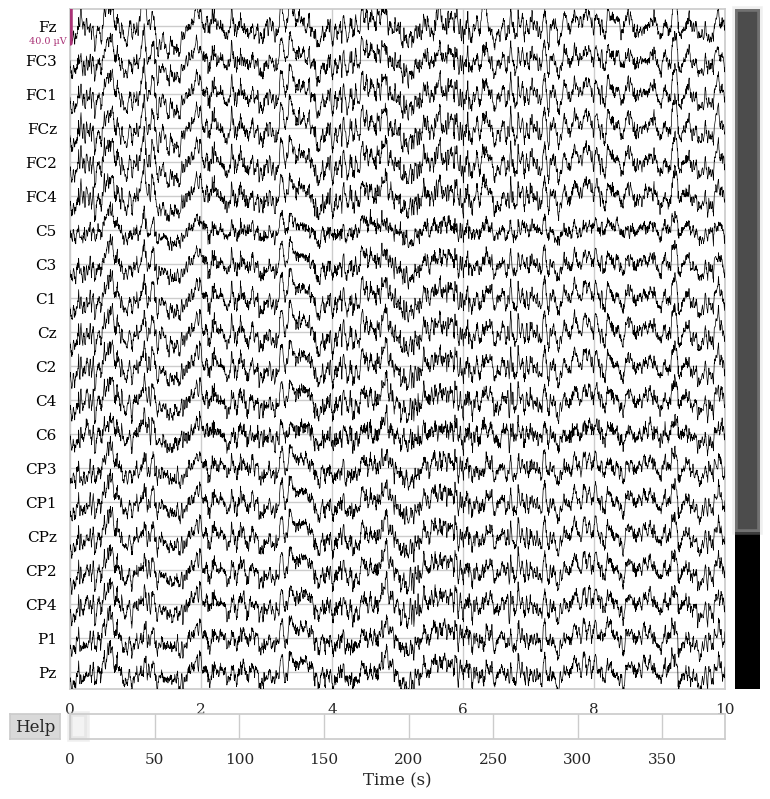

In [15]:
s1['session_T']['run_0'].plot();

Effective window size : 8.192 (s)


<IPython.core.display.Javascript object>


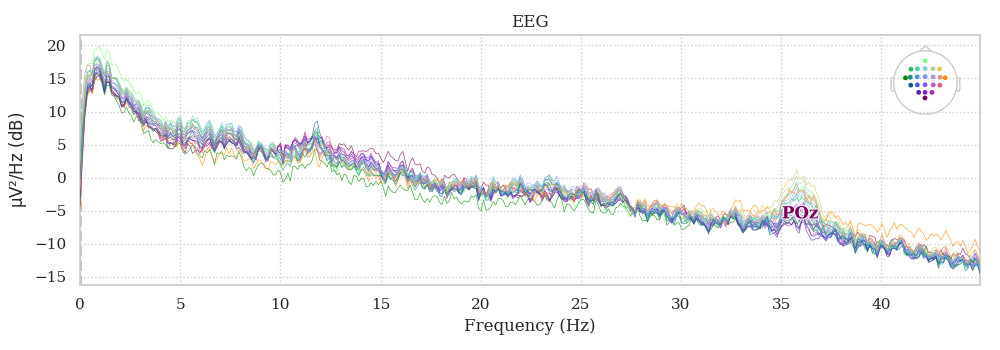

In [22]:
%matplotlib notebook

s1['session_T']['run_0'].compute_psd(fmin=0, fmax=45).plot(picks='data', exclude='bads');

### Apply common-average reference

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<IPython.core.display.Javascript object>


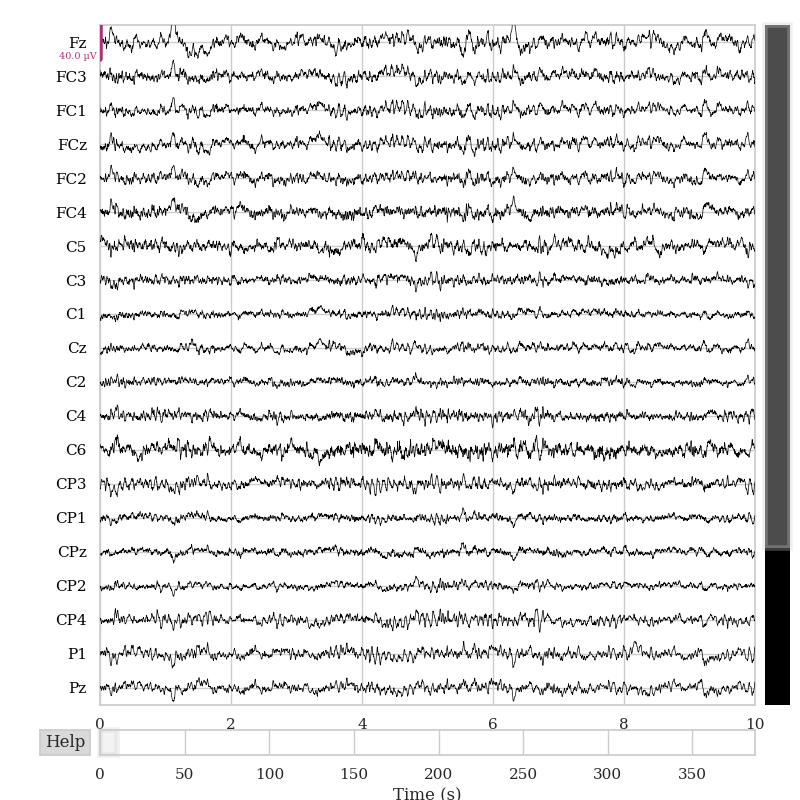

C:\Users\Anna\anaconda3\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


In [24]:
# use the average of all channels as reference
s1['session_T']['run_0'].set_eeg_reference(ref_channels='average')
s1['session_T']['run_0'].plot();

Using multitaper spectrum estimation with 7 DPSS windows


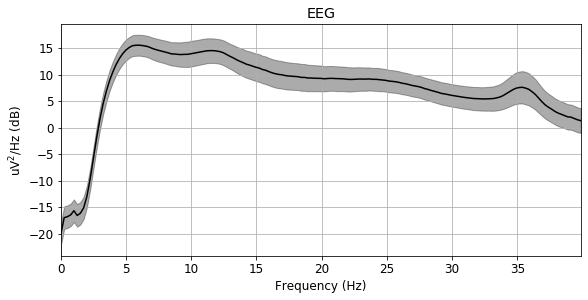

In [ ]:
s1['right_hand'].plot_psd(fmin=0, fmax=45);

### Data info

In [29]:
print(s1['session_T']['run_0'].info)

<Info | 9 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 22 EEG, 3 EOG, 1 Stimulus
 custom_ref_applied: True
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 26
 projs: []
 sfreq: 250.0 Hz
>


<IPython.core.display.Javascript object>


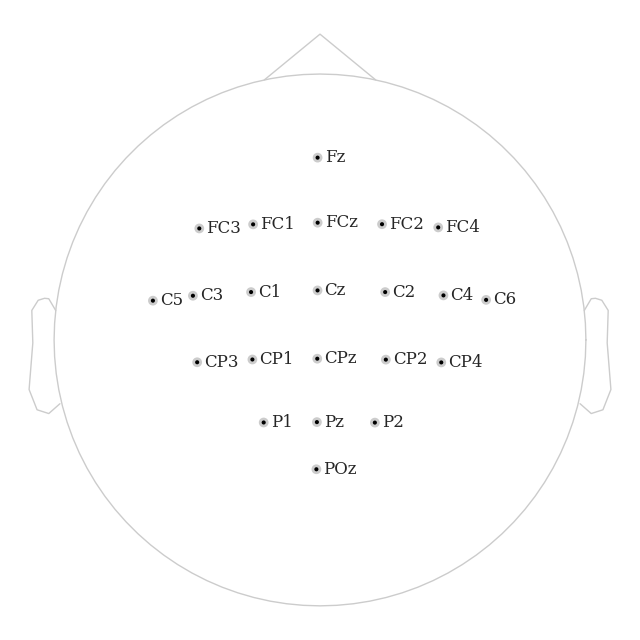

In [30]:
s1['session_T']['run_0'].plot_sensors(title = 'EEG sensor locations and labels',
                show_names = True);

### Band-pass filter
Apply band-pass filter to extract $\mu$ and $\beta$ band EEG features between (8 - 30) Hz

In [ ]:
s1.filter(l_freq = 8, h_freq = 30)

<Epochs  |   288 events (all good), 2 - 6 sec, baseline off, ~15.6 MB, data loaded,
 'left_hand': 144
 'right_hand': 144>

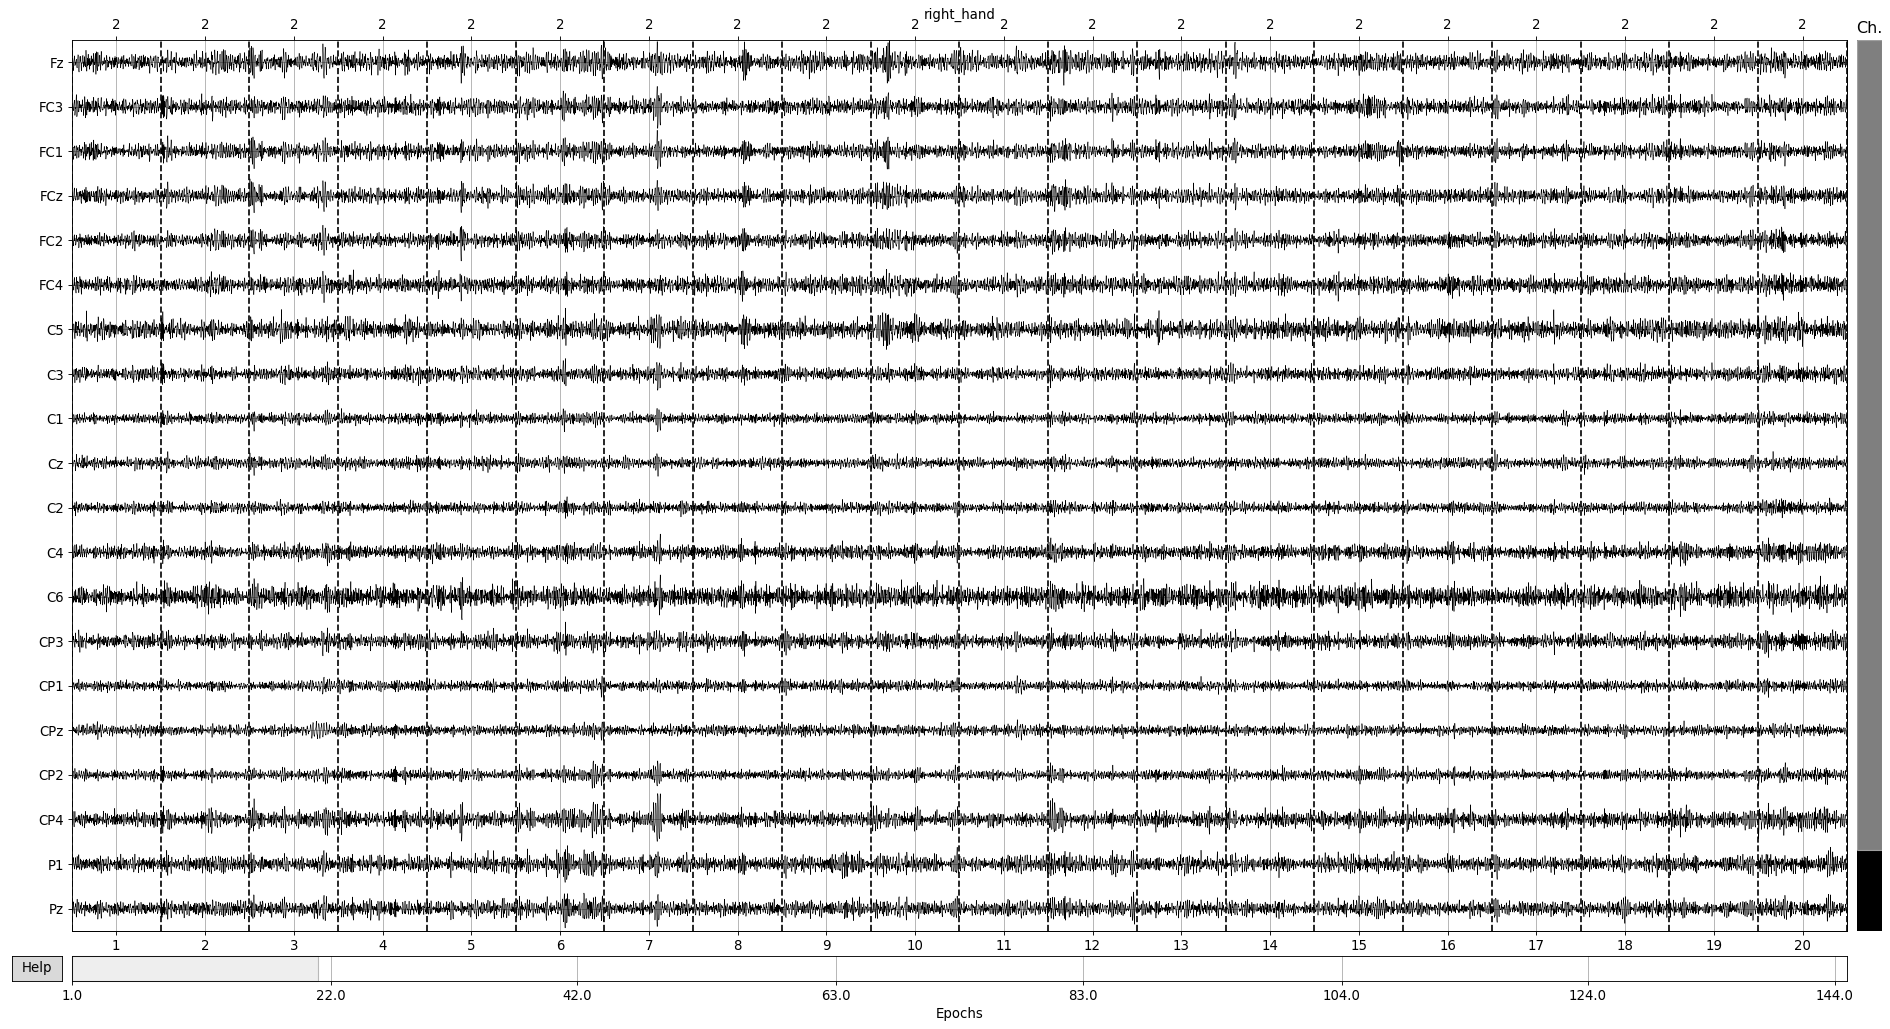

In [ ]:
s1['right_hand'].plot();

<class 'mne.io.array.array.RawArray'>
NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
Effective window size : 8.192 (s)


<IPython.core.display.Javascript object>


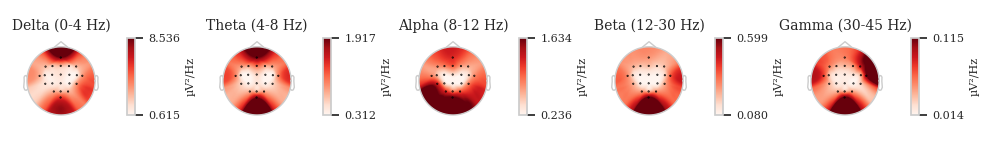

C:\Users\Anna\anaconda3\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


<IPython.core.display.Javascript object>


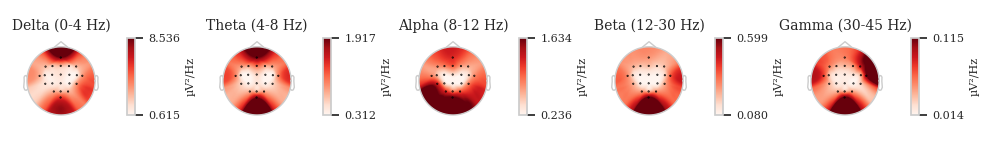

In [34]:
print(type(s1['session_T']['run_0']))
s1['session_T']['run_0'].plot_psd_topomap()
# s1['session_T']['run_0'].plot_image(picks = ['Cz'], scalings = dict(eeg=1e6))

Using multitaper spectrum estimation with 7 DPSS windows


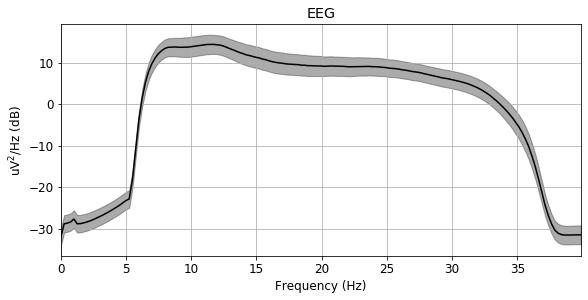

In [ ]:
s1['right_hand'].plot_psd(fmin=0, fmax=45);

In [ ]:
bands = [(4, 8, 'Theta'), (8, 12, 'Mu Rhythm'), (12, 30, 'Beta')]

Using multitaper spectrum estimation with 7 DPSS windows


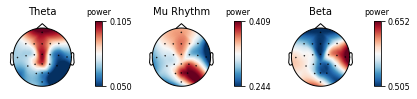

In [ ]:
s1['right_hand'].plot_psd_topomap(bands = bands, normalize = True);

## Get numpy array and visualize 

In [ ]:
print('EEG data is 3D numpy array (trials x channels x time samples) :', 
      s1['right_hand'].get_data().shape)

EEG data is 3D numpy array (trials x channels x time samples) : (144, 22, 321)


In [ ]:
trial = 1
x = s1['right_hand'].get_data()[trial,:,:]
print('Channel x time samples :', x.shape)

Channel x time samples : (22, 321)


Plot single channel data from one trial

In [ ]:
ch_names = s1.info['ch_names']
ch_names

['Fz',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'P1',
 'Pz',
 'P2',
 'POz']

In [ ]:
# which channel to plot? 
channel = 'C4'
chIndex = [i for i, j in enumerate(ch_names) if j == channel]

Text(0.5, 0, 'Time samples')

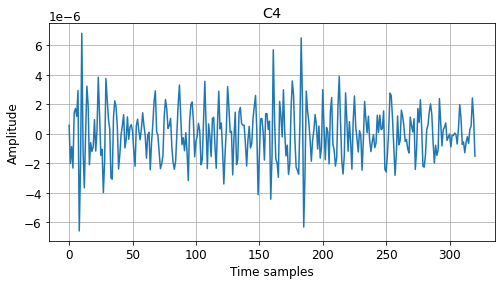

In [ ]:
plt.plot(x[chIndex[0], :])
plt.title(channel)
plt.ylabel('Amplitude')
plt.xlabel('Time samples')